# Descente de gradient sur probleme quadratique jouet

In [9]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

## 1. Mise en place

In [10]:
# Génération du problème quadratique en s'assurant que les CNS d'optimalité sont vérifiées.

def quadratic_problem2d(Lambda): # Lambda : liste de valeurs propres
    A = np.random.rand(2,2)  #Fonction 2 dimensions
    Q,R = np.linalg.qr(A)
    L = np.diag(Lambda)
    P = Q.T@L@Q #Pour s'assurer que P est definit positive
    # with P definite positive
    q = np.random.rand(2,1)
    r = np.random.rand(1) 
    return P,q,r

In [11]:
# Calcul du cout du probleme quadratique

def cost(x):
    cout = .5*x.T@P@x + x.T@q + r # Fonction f
    return cout[0]

In [12]:
# Génération de la fonction qui calcule le gradient
def gradient(x):
    return np.dot(P,x) + q

In [1]:
#Génération de pas par la methode de backtracking

def backtrack(x,d,cost,crit,sigma0,c,rho,fig =False):
    
    # x point in R^n
    # grad, gradient evaluated at x -> point in R^n
    # cost : the cost function 
    # crit : dot product of d with gradient of x -> scalar
    
    #signa0, c, rho : parameters of the bacjtrack
    
    #if fig == True, you should return 
        # sigma, the last step
        # sigma_list : list of evaluated values of sigma
        # flist = corresponding list of the evaluated cost 
    #if fig == False, you should return
        #sigma
    #TO DO   
    sigma= sigma0
    part1=cost(x + sigma*d) #evaluation de la fonction cout au point x
    print(part1)
    print()
    print(cost(x) + c*sigma*crit)
    sigma_list=[sigma0]
    flist= [part1]
    while part1 > (cost(x) + c*sigma*crit):
        sigma=rho*sigma
        part1=cost(x + sigma*d)
        sigma_list.append(sigma)
        flist.append(part1)
        #print(sigma_list)
        #print(flist)
    if fig == True:      
        return sigma, sigma_list, flist          
    else :
        return sigma

In [14]:
#Fonction qui renvoie le pas optimal

def optimal_step(x,grad):
    num = grad.T@grad
    denom = grad.T@P@grad
    return num/denom


[0.79425378]

[[0.47755139]]


C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


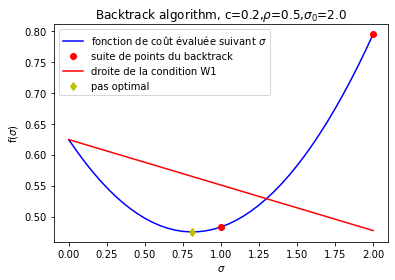

In [15]:
Lambda = np.array((1,2))
P,q,r= quadratic_problem2d(Lambda)
# check solution existency 
xstar = -np.dot(np.linalg.inv(P),q)

sigma0 = 2.
c=.2
rho = 0.5
x0 = np.copy(xstar) + 5*(np.random.rand(2,1)-.5)

grad = gradient(x0)
d=-grad
crit = grad.T@-grad

sigma,sigma_list,flist = backtrack(x0,d,cost,crit,sigma0,c,rho,fig = True)

sigma_wolfe = (0,sigma0)
fwolfe  = (cost(x0), cost(x0) + c*sigma0*crit)

sigma_grid = []
fgrid = []
for i in np.arange(0,sigma0+0.05,0.05):
    sigma_grid.append(i)
    fgrid.append( cost(x0 - i*grad))

plt.figure(1)
plt.plot(sigma_grid,fgrid,'-b',label = 'fonction de coût évaluée suivant 'r'$\sigma$')
plt.plot(sigma_list,flist,'ro',label = 'suite de points du backtrack')   
plt.plot(sigma_wolfe,fwolfe,'r-',label = 'droite de la condition W1' )
plt.plot(optimal_step(x0,grad),cost(x0 - optimal_step(x0,grad)*grad),'yd', label = 'pas optimal')

plt.title("Backtrack algorithm, c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
plt.xlabel(r'$\sigma$')
plt.ylabel("f("r'$\sigma$'")")
plt.legend()

NOTA :
- rho : Facteur de contraction pour améliorer le pas.C'est une valeur qui ne change pas qui est comprise entre 0 et 1.
- grad : direction de descente.

    Les conditions de Wolfe nous montrent ou s'arreter dans la recherche de pas : On prends tous les points qui sont en dessus de la droite(point satisfaisant la condition de Wolfe : points suscetibles d'etre minimum. Ce sont des minimum locaux). C'est pourquoi à la fin, on calcul le pas optimal(optimal_step voir égalamant page 11 cours papier) pour retenir un point qui soit minimum de tous.
    
    
    Quant à l'algo de backtracking, on retient le premier pas qui satisfait la condition de Wolfe qui sera amélioré par rho.
    
    
    

In [9]:
# Implémentation de l'algorithme de descente de gradient proprement dit

In [24]:
def steepest_descent(x0,cost,gradient,method,eps):
    #xlist : list of points
    #flist : list of cost functions
    #nlist : list of gradient norms (stop)
    k=0
    x=x0
    sigma=sigma0
    grad=gradient(x)
    norme=np.linalg.norm(grad)
    xlist=[]
    flist=[]
    nlist=[]
    while norme > eps:
        d=-grad
        xlist.append(x)
        nlist.append(norme)
        flist.append(cost(x + sigma*d))
        crit = grad.T@-grad
        sigma=method(x,d,cost,crit,sigma,c,rho,fig = False) # Appel à backtracking
        x = x+sigma*d
        grad=gradient(x)
        norme=np.linalg.norm(grad)      
        k=k+1
        #print(d.shape)
        
    return xlist,flist,nlist,k


(117, 2, 1)
(206, 2, 1)
(247, 2, 1)
(202, 2, 1)
(141, 2, 1)
(234, 2, 1)
(259, 2, 1)
(209, 2, 1)


C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-26-6bfffbc87c03>:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

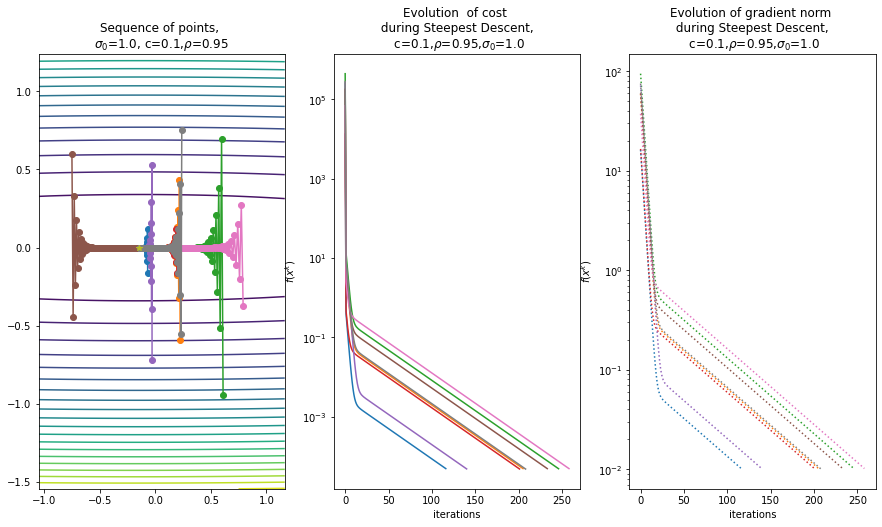

 Il y a au total 209 itérations


In [26]:
#TEST AVEC GRAPHIQUE

Lambda = np.array((1,100))
np.random.seed(seed=1)
P,q,r= quadratic_problem2d(Lambda)
# check solution existency 
xstar = -np.dot(np.linalg.inv(P),q) #CNS de la solution unique
fmin  = cost(xstar)


# bactrack parameters
sigma0 = 1.
c=.1
x0 = np.copy(xstar) + 5*(np.random.rand(2,1)-.5)
rho = 0.95
eps=0.01
#method=backtrack(x0,d,cost,crit,sigma0,c,rho,fig = False) # Appel à backtracking
#grid
ax = xstar[0]
bx = xstar[0]
ay = xstar[1]
by = xstar[1]

for test in range(8): # C'est ici qu'on genere les 5 points de départ 
    x0 = np.copy(xstar) + 2.*(np.random.rand(2,1)-.5)
    #
 
    xlist,flist,nlist,k =  steepest_descent(x0,cost,gradient,backtrack,eps)
    xlist = np.asarray(xlist)
    print(xlist.shape)
    #
    fig = plt.figure(1,figsize=(15,8)) # 
    
    plt.subplot(1,3,1)
    #plt.plot(xlist[0:2,0], xlist[0:2,1],'o-',label='plt.scatter(a[:], a[:])')
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
    plt.title("Sequence of points, \n"r'$\sigma_0$'"="+str(sigma0)+", c="+str(c)+","r'$\rho$'"="+str(rho)) # On a ici 5 points de départ différents : C'est la différence de couleurs: C'est pour montrer que peu importe la valeur de sigma0, la methode converge.
#    #
    ax = np.min((xlist[:,0,0].min(),ax))-.1
    bx = np.max((xlist[:,0,0].max(),bx))+.1
    ay = np.min((xlist[:,1,0].min(),ay))-.1
    by = np.max((xlist[:,1,0].max(),by))+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist-fmin+1e-16)
    plt.title("Evolution  of cost \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.title("Evolution of gradient norm \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid) # Transforme les vecteurs (xgrid,ygrid) en tableau (X,Y)  
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,21) # fonction qui trace les isocontours(courbes de niveau) à partir de X et Y de X, Y = np.meshgrid(xgrid, ygrid)
# Z: Les valeurs de hauteur sur lesquelles le contour est dessiné. Dans notre cas est lié à la fonction cost.

plt.plot(xstar[0], xstar[1],'*',label='points')
plt.show()
print(" Il y a au total {} itérations".format(k)) # Les itérations dépendent égalment de nombres de points générés et de leurs positions.

### Nota : 

Les valeurs propres sont très éloignées.
La fonction dont la droite reste le plus longtemps verticale est celle qui converge rapidement.
Dans ce cas, c'est la bleue.C'est relatif à son point de départ. Cependant, peu importe le point de départ et le nombre d'itérations, la fonction converge.
La convergence apparait après une centaine d'itérations (k). C'est le cas où les courbes de niveau(isocontours) forment des ellipses. La géométrie de l'ellipse est liée aux valeurs propres(Lambda).

## 2.Experimentations

### 2.1 Premier exemple - Cas n◦1 Λ = {1, 2}


grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
(11, 2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
(15, 2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
(17, 2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
(12, 2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
grad
(2, 1)
(16, 2, 1)


C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-18-47a373d71eff>:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
<ipython-input-18-47a373d71eff>:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be 

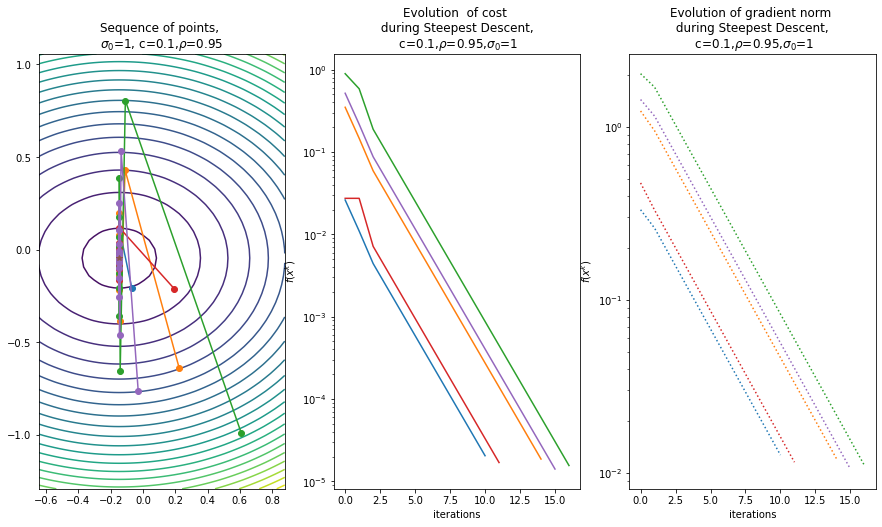

 Il y a au total 16 itérations


In [18]:
#TEST AVEC GRAPHIQUE

Lambda = np.array((1,2)) # Les valeurs propres
np.random.seed(seed=1)
P,q,r= quadratic_problem2d(Lambda)
# check solution existency 
xstar = -np.dot(np.linalg.inv(P),q) #CNS de la solution unique
fmin  = cost(xstar)


# bactrack parameters
sigma0 = 1
c=.1
x0 = np.copy(xstar) + 5*(np.random.rand(2,1)-.5)
rho = 0.95
eps=0.01
#method=backtrack(x0,d,cost,crit,sigma0,c,rho,fig = False) # Appel à backtracking
#grid
ax = xstar[0]
bx = xstar[0]
ay = xstar[1]
by = xstar[1]

for test in range(5): # C'est ici qu'on genere les 5 points de départ 
    x0 = np.copy(xstar) + 2.*(np.random.rand(2,1)-.5)
    #
 
    xlist,flist,nlist,k =  steepest_descent(x0,cost,gradient,backtrack,eps)
    xlist = np.asarray(xlist)
    print(xlist.shape)
    #
    fig = plt.figure(1,figsize=(15,8)) # 
    
    plt.subplot(1,3,1)
    #plt.plot(xlist[0:2,0], xlist[0:2,1],'o-',label='plt.scatter(a[:], a[:])')
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
    plt.title("Sequence of points, \n"r'$\sigma_0$'"="+str(sigma0)+", c="+str(c)+","r'$\rho$'"="+str(rho)) # On a ici 5 points de départ différents : C'est la différence de couleurs: C'est pour montrer que peu importe la valeur de sigma0, la methode converge.
#    #
    ax = np.min((xlist[:,0,0].min(),ax))-.1
    bx = np.max((xlist[:,0,0].max(),bx))+.1
    ay = np.min((xlist[:,1,0].min(),ay))-.1
    by = np.max((xlist[:,1,0].max(),by))+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist-fmin+1e-16)
    plt.title("Evolution  of cost \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.title("Evolution of gradient norm \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid) # Transforme les vecteurs (xgrid,ygrid) en tableau (X,Y)  
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,21) # fonction qui trace les isocontours(courbes de niveau) à partir de X et Y de X, Y = np.meshgrid(xgrid, ygrid)
# Z: Les valeurs de hauteur sur lesquelles le contour est dessiné. Dans notre cas est lié à la fonction cost.

plt.plot(xstar[0], xstar[1],'*',label='points')
plt.show()
print(" Il y a au total {} itérations".format(k)) # Les itérations dépendent égalment de nombres de points générés et de leurs positions.

C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-34-1d1dc1e752cc>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

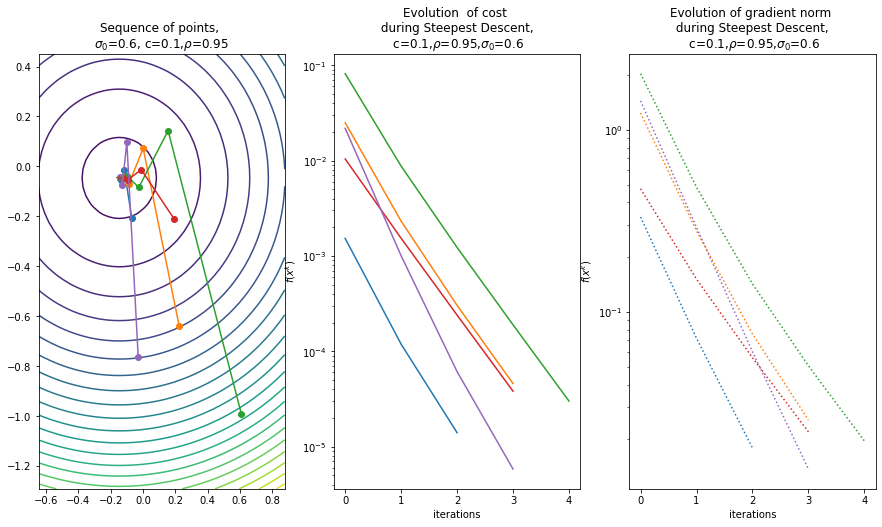

 Il y a au total 4 itérations


In [34]:
#TEST AVEC GRAPHIQUE

Lambda = np.array((1,2)) # Les valeurs propres
np.random.seed(seed=1)
P,q,r= quadratic_problem2d(Lambda)
# check solution existency 
xstar = -np.dot(np.linalg.inv(P),q) #CNS de la solution unique
fmin  = cost(xstar)


# bactrack parameters
sigma0 = 0.6
c=.1
x0 = np.copy(xstar) + 5*(np.random.rand(2,1)-.5)
rho = 0.95
eps=0.01
#method=backtrack(x0,d,cost,crit,sigma0,c,rho,fig = False) # Appel à backtracking
#grid
ax = xstar[0]
bx = xstar[0]
ay = xstar[1]
by = xstar[1]

for test in range(5): # C'est ici qu'on genere les 5 points de départ 
    x0 = np.copy(xstar) + 2.*(np.random.rand(2,1)-.5)
    #
 
    xlist,flist,nlist,k =  steepest_descent(x0,cost,gradient,backtrack,eps)
    xlist = np.asarray(xlist)
    #
    fig = plt.figure(1,figsize=(15,8)) # 
    
    plt.subplot(1,3,1)
    #plt.plot(xlist[0:2,0], xlist[0:2,1],'o-',label='plt.scatter(a[:], a[:])')
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
    plt.title("Sequence of points, \n"r'$\sigma_0$'"="+str(sigma0)+", c="+str(c)+","r'$\rho$'"="+str(rho)) # On a ici 5 points de départ différents : C'est la différence de couleurs: C'est pour montrer que peu importe la valeur de sigma0, la methode converge.
#    #
    ax = np.min((xlist[:,0,0].min(),ax))-.1
    bx = np.max((xlist[:,0,0].max(),bx))+.1
    ay = np.min((xlist[:,1,0].min(),ay))-.1
    by = np.max((xlist[:,1,0].max(),by))+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist-fmin+1e-16)
    plt.title("Evolution  of cost \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.title("Evolution of gradient norm \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid) # Transforme les vecteurs (xgrid,ygrid) en tableau (X,Y)  
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,21) # fonction qui trace les isocontours(courbes de niveau) à partir de X et Y de X, Y = np.meshgrid(xgrid, ygrid)
# Z: Les valeurs de hauteur sur lesquelles le contour est dessiné. Dans notre cas est lié à la fonction cost.

plt.plot(xstar[0], xstar[1],'*',label='points')
plt.show()
print(" Il y a au total {} itérations".format(k)) # Les itérations dépendent égalment de nombres de points générés et de leurs positions.

### Nota

Les valeurs propres (1 et 2) sont proches(en terme d'égalité de valeurs).
Le cas où les courbes de niveaux sont presque des cercles. La méthode de descente de gradient est bien adaptée à cette fonction.
On constate que le convergence est très rapide. Il ya une dizaine d'itérations. On peut l'observer à l'aide des droites de fonctions qui sont assez rectilignes.

### 2.2 Cas n◦2 Λ = {1, 1.0001}


C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-35-51564b3c3a8c>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

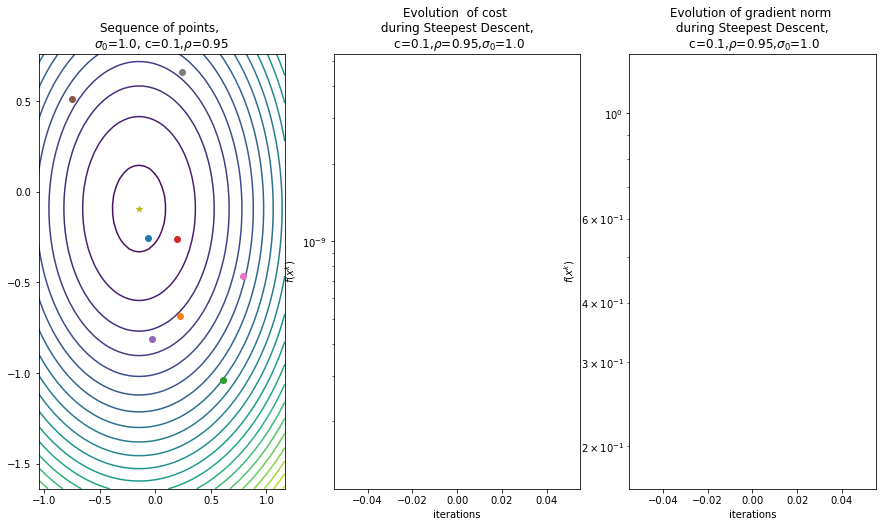

 Il y a au total 1 itérations


In [35]:
#TEST AVEC GRAPHIQUE

Lambda = np.array((1,1.0001)) # Presque égale à l'indentité
np.random.seed(seed=1)
P,q,r= quadratic_problem2d(Lambda)
# check solution existency 
xstar = -np.dot(np.linalg.inv(P),q) #CNS de la solution unique
fmin  = cost(xstar)


# bactrack parameters
sigma0 = 1.
c=.1
x0 = np.copy(xstar) + 5*(np.random.rand(2,1)-.5)
rho = 0.95
eps=0.01
#method=backtrack(x0,d,cost,crit,sigma0,c,rho,fig = False) # Appel à backtracking
#grid
ax = xstar[0]
bx = xstar[0]
ay = xstar[1]
by = xstar[1]

for test in range(8): # C'est ici qu'on genere les 5 points de départ 
    x0 = np.copy(xstar) + 2.*(np.random.rand(2,1)-.5)
    #
 
    xlist,flist,nlist,k =  steepest_descent(x0,cost,gradient,backtrack,eps)
    xlist = np.asarray(xlist)
    #
    fig = plt.figure(1,figsize=(15,8)) # 
    
    plt.subplot(1,3,1)
    #plt.plot(xlist[0:2,0], xlist[0:2,1],'o-',label='plt.scatter(a[:], a[:])')
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
    plt.title("Sequence of points, \n"r'$\sigma_0$'"="+str(sigma0)+", c="+str(c)+","r'$\rho$'"="+str(rho)) # On a ici 5 points de départ différents : C'est la différence de couleurs: C'est pour montrer que peu importe la valeur de sigma0, la methode converge.
#    #
    ax = np.min((xlist[:,0,0].min(),ax))-.1
    bx = np.max((xlist[:,0,0].max(),bx))+.1
    ay = np.min((xlist[:,1,0].min(),ay))-.1
    by = np.max((xlist[:,1,0].max(),by))+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist-fmin+1e-16)
    plt.title("Evolution  of cost \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.title("Evolution of gradient norm \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid) # Transforme les vecteurs (xgrid,ygrid) en tableau (X,Y)  
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,21) # fonction qui trace les isocontours(courbes de niveau) à partir de X et Y de X, Y = np.meshgrid(xgrid, ygrid)
# Z: Les valeurs de hauteur sur lesquelles le contour est dessiné. Dans notre cas est lié à la fonction cost.

plt.plot(xstar[0], xstar[1],'*',label='points')
plt.show()
print(" Il y a au total {} itérations".format(k)) # Les itérations dépendent égalment de nombres de points générés et de leurs positions.

### Nota :
Lorsque les deux valeurs propres sont égales(matrice presque égale à l'identité). 
Peut importe le point de départ, il nya pas de convergence vers le minimum global.
Tous ces points sont minimum locaux. A cause de la valeur du pas, on s'écarte de l'optimum global.

### Diminuons le pas simga0

C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-36-e08c8a6d9fc3>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

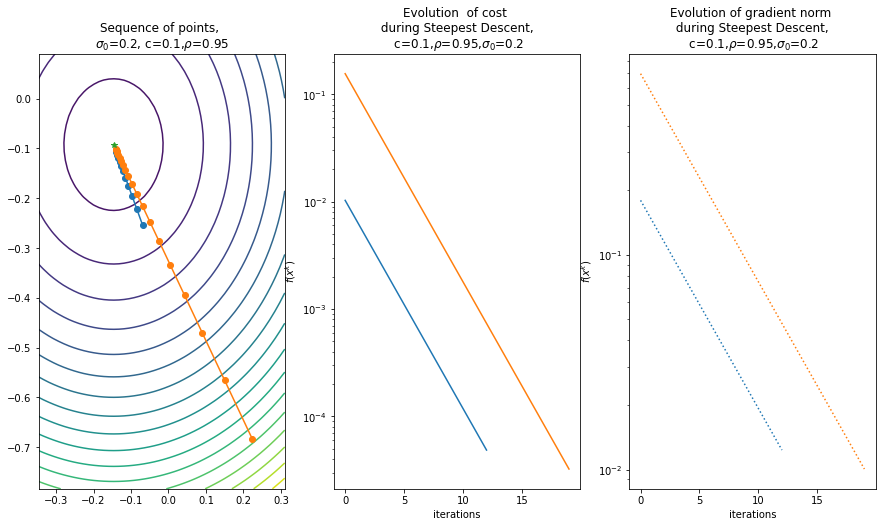

 Il y a au total 20 itérations


In [36]:
#TEST AVEC GRAPHIQUE

Lambda = np.array((1,1.0001)) # Presque égale à l'indentité
np.random.seed(seed=1)
P,q,r= quadratic_problem2d(Lambda)
# check solution existency 
xstar = -np.dot(np.linalg.inv(P),q) #CNS de la solution unique
fmin  = cost(xstar)


# bactrack parameters
sigma0 = 0.2
c=.1
x0 = np.copy(xstar) + 5*(np.random.rand(2,1)-.5)
rho = 0.95
eps=0.01
#method=backtrack(x0,d,cost,crit,sigma0,c,rho,fig = False) # Appel à backtracking
#grid
ax = xstar[0]
bx = xstar[0]
ay = xstar[1]
by = xstar[1]

for test in range(2): # C'est ici qu'on genere les 5 points de départ 
    x0 = np.copy(xstar) + 2.*(np.random.rand(2,1)-.5)
    #
 
    xlist,flist,nlist,k =  steepest_descent(x0,cost,gradient,backtrack,eps)
    xlist = np.asarray(xlist)
    #
    fig = plt.figure(1,figsize=(15,8)) # 
    
    plt.subplot(1,3,1)
    #plt.plot(xlist[0:2,0], xlist[0:2,1],'o-',label='plt.scatter(a[:], a[:])')
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
    plt.title("Sequence of points, \n"r'$\sigma_0$'"="+str(sigma0)+", c="+str(c)+","r'$\rho$'"="+str(rho)) # On a ici 5 points de départ différents : C'est la différence de couleurs: C'est pour montrer que peu importe la valeur de sigma0, la methode converge.
#    #
    ax = np.min((xlist[:,0,0].min(),ax))-.1
    bx = np.max((xlist[:,0,0].max(),bx))+.1
    ay = np.min((xlist[:,1,0].min(),ay))-.1
    by = np.max((xlist[:,1,0].max(),by))+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist-fmin+1e-16)
    plt.title("Evolution  of cost \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.title("Evolution of gradient norm \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid) # Transforme les vecteurs (xgrid,ygrid) en tableau (X,Y)  
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,21) # fonction qui trace les isocontours(courbes de niveau) à partir de X et Y de X, Y = np.meshgrid(xgrid, ygrid)
# Z: Les valeurs de hauteur sur lesquelles le contour est dessiné. Dans notre cas est lié à la fonction cost.

plt.plot(xstar[0], xstar[1],'*',label='points')
plt.show()
print(" Il y a au total {} itérations".format(k)) # Les itérations dépendent égalment de nombres de points générés et de leurs positions.

### Nota:

Quand on diminue le pas, la methode converge.Cependant:

1. Quand le pas est "idéal", nous avons moins d'itérations et la convergence vers le minimum global .
2. Quand le pas est très petit, la méthode converge tout de même vers le minimum global mais avec plus d'itérations.
3. A partir du pas =0.8, nous avons deja tendance à s'écarter du minimum global bien que l'o peut observer la convergence. 
4. Dans ce cas précis, le pas idéal serait 0.6.


C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-37-c14e678f04e1>:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)


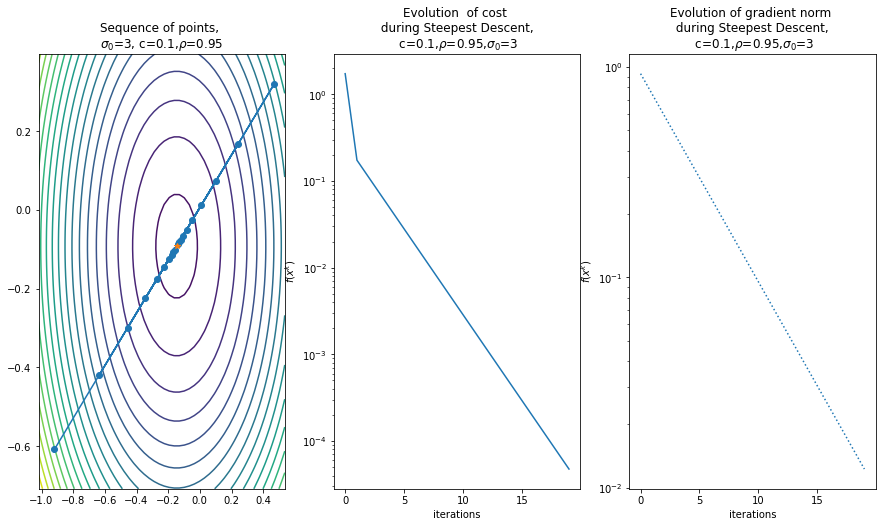

 Il y a au total 20 itérations


In [37]:
#TEST AVEC GRAPHIQUE

Lambda = np.array((1,1.0001)) # Presque égale à l'indentité
np.random.seed(seed=1)
P,q,r= quadratic_problem2d(Lambda)
# check solution existency 
xstar = -np.dot(np.linalg.inv(P),q) #CNS de la solution unique
fmin  = cost(xstar)


# bactrack parameters
sigma0 = 3
c=.1
x0 = np.copy(xstar) + 5*(np.random.rand(2,1)-.5)#
rho = 0.95
eps=0.01
#method=backtrack(x0,d,cost,crit,sigma0,c,rho,fig = False) # Appel à backtracking
#grid
ax = xstar[0]
bx = xstar[0]
ay = xstar[1]
by = xstar[1]


 
xlist,flist,nlist,k =  steepest_descent(x0,cost,gradient,backtrack,eps)
xlist = np.asarray(xlist)
    #
fig = plt.figure(1,figsize=(15,8)) # 
    
plt.subplot(1,3,1)
    #plt.plot(xlist[0:2,0], xlist[0:2,1],'o-',label='plt.scatter(a[:], a[:])')
plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
plt.title("Sequence of points, \n"r'$\sigma_0$'"="+str(sigma0)+", c="+str(c)+","r'$\rho$'"="+str(rho)) # On a ici 5 points de départ différents : C'est la différence de couleurs: C'est pour montrer que peu importe la valeur de sigma0, la methode converge.
#    #
ax = np.min((xlist[:,0,0].min(),ax))-.1
bx = np.max((xlist[:,0,0].max(),bx))+.1
ay = np.min((xlist[:,1,0].min(),ay))-.1
by = np.max((xlist[:,1,0].max(),by))+.1
    
plt.subplot(1,3,2)
plt.semilogy(range(len(flist)),flist-fmin+1e-16)
plt.title("Evolution  of cost \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
plt.xlabel('iterations')
plt.ylabel(r'$f(x^k)$')
    
plt.subplot(1,3,3)
plt.semilogy(nlist,':')
plt.title("Evolution of gradient norm \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
plt.xlabel('iterations')
plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid) # Transforme les vecteurs (xgrid,ygrid) en tableau (X,Y)  
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,21) # fonction qui trace les isocontours(courbes de niveau) à partir de X et Y de X, Y = np.meshgrid(xgrid, ygrid)
# Z: Les valeurs de hauteur sur lesquelles le contour est dessiné. Dans notre cas est lié à la fonction cost.

plt.plot(xstar[0], xstar[1],'*',label='points')
plt.show()
print(" Il y a au total {} itérations".format(k)) # Les itérations dépendent égalment de nombres de points générés et de leurs positions.

### Nota:

    Dans ce cas, la valeur de sigma0=1 ou tres proche de 1 sont des très mauvais pas qui nous éloignent du le minimum global. 
    
    POURQUOI ??????

### Cas n◦3 Λ = {1, 10}

C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-38-96ac34648964>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

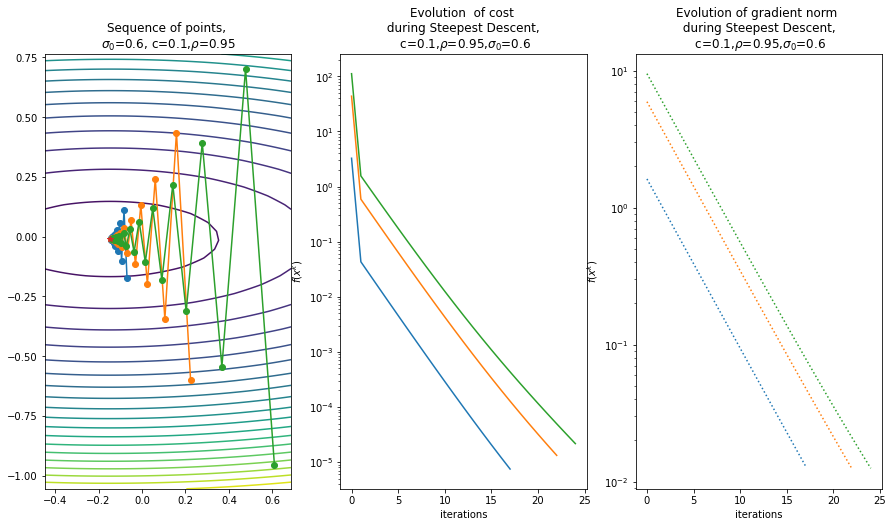

 Il y a au total 25 itérations


In [38]:
#TEST AVEC GRAPHIQUE

Lambda = np.array((1,10))
np.random.seed(seed=1)
P,q,r= quadratic_problem2d(Lambda)
# check solution existency 
xstar = -np.dot(np.linalg.inv(P),q) #CNS de la solution unique
fmin  = cost(xstar)


# bactrack parameters
sigma0 = 0.6
c=.1
x0 = np.copy(xstar) + 5*(np.random.rand(2,1)-.5)
rho = 0.95
eps=0.01
#method=backtrack(x0,d,cost,crit,sigma0,c,rho,fig = False) # Appel à backtracking
#grid
ax = xstar[0]
bx = xstar[0]
ay = xstar[1]
by = xstar[1]

for test in range(3): # C'est ici qu'on genere les 5 points de départ 
    x0 = np.copy(xstar) + 2.*(np.random.rand(2,1)-.5)
    #
 
    xlist,flist,nlist,k =  steepest_descent(x0,cost,gradient,backtrack,eps)
    xlist = np.asarray(xlist)
    #
    fig = plt.figure(1,figsize=(15,8)) # 
    
    plt.subplot(1,3,1)
    #plt.plot(xlist[0:2,0], xlist[0:2,1],'o-',label='plt.scatter(a[:], a[:])')
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
    plt.title("Sequence of points, \n"r'$\sigma_0$'"="+str(sigma0)+", c="+str(c)+","r'$\rho$'"="+str(rho)) # On a ici 5 points de départ différents : C'est la différence de couleurs: C'est pour montrer que peu importe la valeur de sigma0, la methode converge.
#    #
    ax = np.min((xlist[:,0,0].min(),ax))-.1
    bx = np.max((xlist[:,0,0].max(),bx))+.1
    ay = np.min((xlist[:,1,0].min(),ay))-.1
    by = np.max((xlist[:,1,0].max(),by))+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist-fmin+1e-16)
    plt.title("Evolution  of cost \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.title("Evolution of gradient norm \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid) # Transforme les vecteurs (xgrid,ygrid) en tableau (X,Y)  
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,21) # fonction qui trace les isocontours(courbes de niveau) à partir de X et Y de X, Y = np.meshgrid(xgrid, ygrid)
# Z: Les valeurs de hauteur sur lesquelles le contour est dessiné. Dans notre cas est lié à la fonction cost.

plt.plot(xstar[0], xstar[1],'*',label='points')
plt.show()
print(" Il y a au total {} itérations".format(k)) # Les itérations dépendent égalment de nombres de points générés et de leurs positions.

C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-39-bf0a1774872f>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

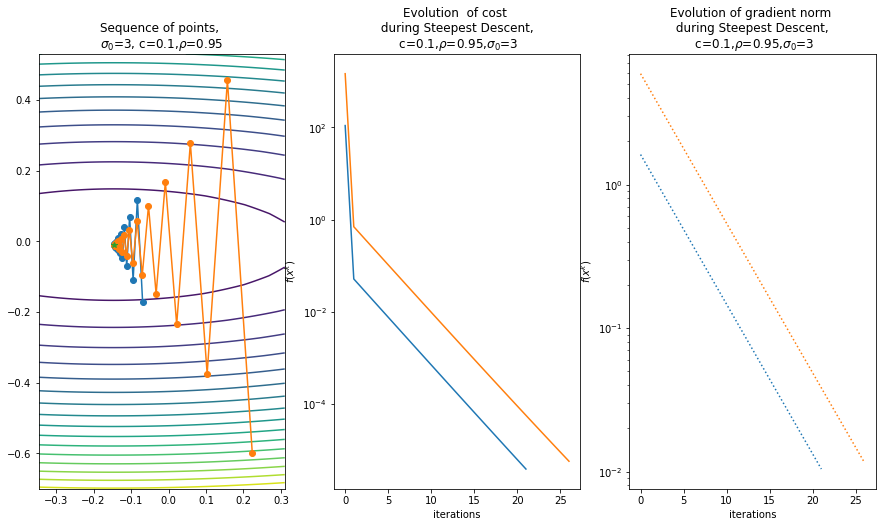

 Il y a au total 27 itérations


In [39]:
#TEST AVEC GRAPHIQUE

Lambda = np.array((1,10)) # 
np.random.seed(seed=1)
P,q,r= quadratic_problem2d(Lambda)
# check solution existency 
xstar = -np.dot(np.linalg.inv(P),q) #CNS de la solution unique
fmin  = cost(xstar)


# bactrack parameters
sigma0 = 3
c=.1
x0 = np.copy(xstar) + 5*(np.random.rand(2,1)-.5)
rho = 0.95
eps=0.01
#method=backtrack(x0,d,cost,crit,sigma0,c,rho,fig = False) # Appel à backtracking
#grid
ax = xstar[0]
bx = xstar[0]
ay = xstar[1]
by = xstar[1]

for test in range(2): # C'est ici qu'on genere les 5 points de départ 
    x0 = np.copy(xstar) + 2.*(np.random.rand(2,1)-.5)
    #
 
    xlist,flist,nlist,k =  steepest_descent(x0,cost,gradient,backtrack,eps)
    xlist = np.asarray(xlist)
    #
    fig = plt.figure(1,figsize=(15,8)) # 
    
    plt.subplot(1,3,1)
    #plt.plot(xlist[0:2,0], xlist[0:2,1],'o-',label='plt.scatter(a[:], a[:])')
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
    plt.title("Sequence of points, \n"r'$\sigma_0$'"="+str(sigma0)+", c="+str(c)+","r'$\rho$'"="+str(rho)) # On a ici 5 points de départ différents : C'est la différence de couleurs: C'est pour montrer que peu importe la valeur de sigma0, la methode converge.
#    #
    ax = np.min((xlist[:,0,0].min(),ax))-.1
    bx = np.max((xlist[:,0,0].max(),bx))+.1
    ay = np.min((xlist[:,1,0].min(),ay))-.1
    by = np.max((xlist[:,1,0].max(),by))+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist-fmin+1e-16)
    plt.title("Evolution  of cost \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.title("Evolution of gradient norm \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid) # Transforme les vecteurs (xgrid,ygrid) en tableau (X,Y)  
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,21) # fonction qui trace les isocontours(courbes de niveau) à partir de X et Y de X, Y = np.meshgrid(xgrid, ygrid)
# Z: Les valeurs de hauteur sur lesquelles le contour est dessiné. Dans notre cas est lié à la fonction cost.

plt.plot(xstar[0], xstar[1],'*',label='points')
plt.show()
print(" Il y a au total {} itérations".format(k)) # Les itérations dépendent égalment de nombres de points générés et de leurs positions.

### Nota:

Avec cette forme,sigma0 n'influence pas trop les résultats. Il influence un peu le nombre d'itérations. Dans ce cas, peu importe le pas , la methode converge vers le minimum global.


POURQUOI ?????

### Cas n◦4 Λ = {1, 100}

C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-40-65aed7e54bf2>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

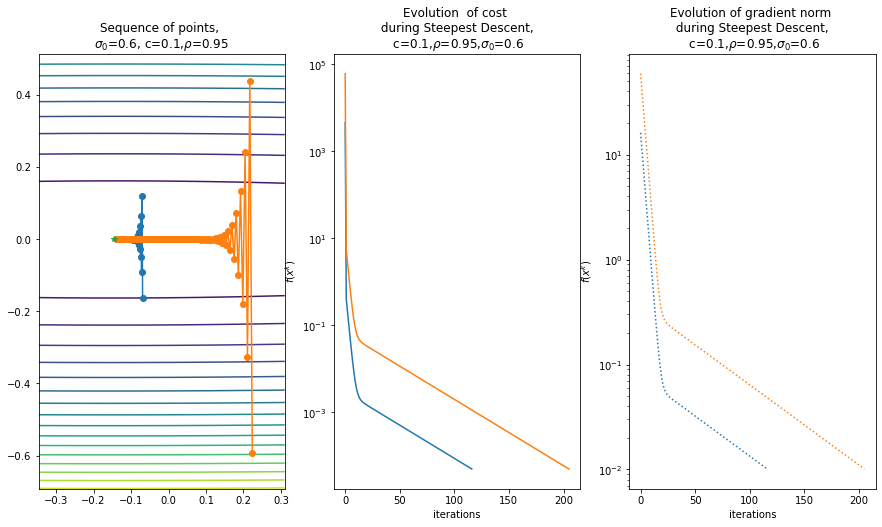

 Il y a au total 206 itérations


In [40]:
#TEST AVEC GRAPHIQUE

Lambda = np.array((1,100)) # 
np.random.seed(seed=1)
P,q,r= quadratic_problem2d(Lambda)
# check solution existency 
xstar = -np.dot(np.linalg.inv(P),q) #CNS de la solution unique
fmin  = cost(xstar)


# bactrack parameters
sigma0 = 0.6
c=.1
x0 = np.copy(xstar) + 5*(np.random.rand(2,1)-.5)
rho = 0.95
eps=0.01
#method=backtrack(x0,d,cost,crit,sigma0,c,rho,fig = False) # Appel à backtracking
#grid
ax = xstar[0]
bx = xstar[0]
ay = xstar[1]
by = xstar[1]

for test in range(2): # C'est ici qu'on genere les 5 points de départ 
    x0 = np.copy(xstar) + 2.*(np.random.rand(2,1)-.5)
    #
 
    xlist,flist,nlist,k =  steepest_descent(x0,cost,gradient,backtrack,eps)
    xlist = np.asarray(xlist)
    #
    fig = plt.figure(1,figsize=(15,8)) # 
    
    plt.subplot(1,3,1)
    #plt.plot(xlist[0:2,0], xlist[0:2,1],'o-',label='plt.scatter(a[:], a[:])')
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
    plt.title("Sequence of points, \n"r'$\sigma_0$'"="+str(sigma0)+", c="+str(c)+","r'$\rho$'"="+str(rho)) # On a ici 5 points de départ différents : C'est la différence de couleurs: C'est pour montrer que peu importe la valeur de sigma0, la methode converge.
#    #
    ax = np.min((xlist[:,0,0].min(),ax))-.1
    bx = np.max((xlist[:,0,0].max(),bx))+.1
    ay = np.min((xlist[:,1,0].min(),ay))-.1
    by = np.max((xlist[:,1,0].max(),by))+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist-fmin+1e-16)
    plt.title("Evolution  of cost \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.title("Evolution of gradient norm \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid) # Transforme les vecteurs (xgrid,ygrid) en tableau (X,Y)  
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,21) # fonction qui trace les isocontours(courbes de niveau) à partir de X et Y de X, Y = np.meshgrid(xgrid, ygrid)
# Z: Les valeurs de hauteur sur lesquelles le contour est dessiné. Dans notre cas est lié à la fonction cost.

plt.plot(xstar[0], xstar[1],'*',label='points')
plt.show()
print(" Il y a au total {} itérations".format(k)) # Les itérations dépendent égalment de nombres de points générés et de leurs positions.

C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-41-ad3111464ce4>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

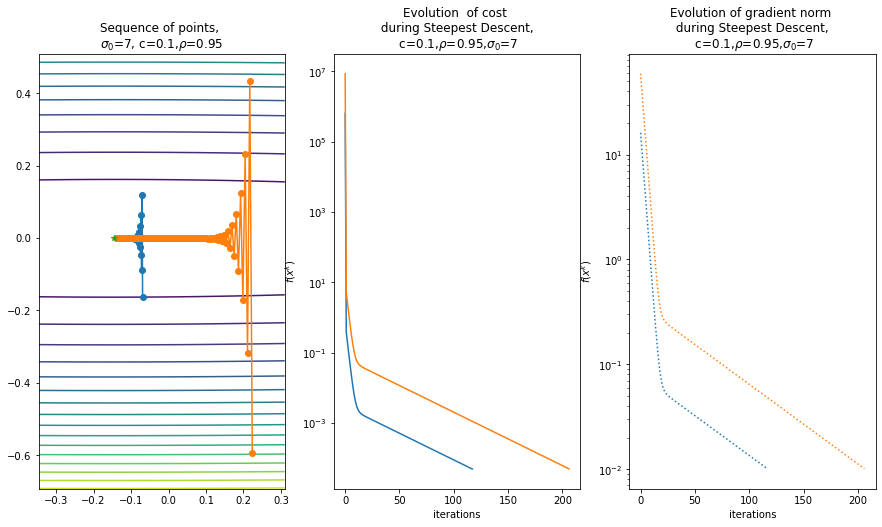

 Il y a au total 207 itérations


In [41]:
#TEST AVEC GRAPHIQUE

Lambda = np.array((1,100)) # 
np.random.seed(seed=1)
P,q,r= quadratic_problem2d(Lambda)
# check solution existency 
xstar = -np.dot(np.linalg.inv(P),q) #CNS de la solution unique
fmin  = cost(xstar)


# bactrack parameters
sigma0 = 7
c=.1
x0 = np.copy(xstar) + 5*(np.random.rand(2,1)-.5)
rho = 0.95
eps=0.01
#method=backtrack(x0,d,cost,crit,sigma0,c,rho,fig = False) # Appel à backtracking
#grid
ax = xstar[0]
bx = xstar[0]
ay = xstar[1]
by = xstar[1]

for test in range(2): # C'est ici qu'on genere les 5 points de départ 
    x0 = np.copy(xstar) + 2.*(np.random.rand(2,1)-.5)
    #
 
    xlist,flist,nlist,k =  steepest_descent(x0,cost,gradient,backtrack,eps)
    xlist = np.asarray(xlist)
    #
    fig = plt.figure(1,figsize=(15,8)) # 
    
    plt.subplot(1,3,1)
    #plt.plot(xlist[0:2,0], xlist[0:2,1],'o-',label='plt.scatter(a[:], a[:])')
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
    plt.title("Sequence of points, \n"r'$\sigma_0$'"="+str(sigma0)+", c="+str(c)+","r'$\rho$'"="+str(rho)) # On a ici 5 points de départ différents : C'est la différence de couleurs: C'est pour montrer que peu importe la valeur de sigma0, la methode converge.
#    #
    ax = np.min((xlist[:,0,0].min(),ax))-.1
    bx = np.max((xlist[:,0,0].max(),bx))+.1
    ay = np.min((xlist[:,1,0].min(),ay))-.1
    by = np.max((xlist[:,1,0].max(),by))+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist-fmin+1e-16)
    plt.title("Evolution  of cost \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.title("Evolution of gradient norm \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid) # Transforme les vecteurs (xgrid,ygrid) en tableau (X,Y)  
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,21) # fonction qui trace les isocontours(courbes de niveau) à partir de X et Y de X, Y = np.meshgrid(xgrid, ygrid)
# Z: Les valeurs de hauteur sur lesquelles le contour est dessiné. Dans notre cas est lié à la fonction cost.

plt.plot(xstar[0], xstar[1],'*',label='points')
plt.show()
print(" Il y a au total {} itérations".format(k)) # Les itérations dépendent égalment de nombres de points générés et de leurs positions.

### NOTA:
    Dans ce cas, peu importe le pas , la methode converge vers le minimum global.
    
    
    
    La version sur Universitice contient le nombre d'itérations de chaque appel de fonction de descente de gradient.

# Conclusion (Pour révision)

1. Valeurs propres : 1,2
2. Vitesse de convergence : très rapide
3. Forme de courbes : presque cercle
4. Influence de sigma0 : assez remarquable
5. Convegence : assurée

#
1. Valeurs propres : 1,10
2. Vitesse de convergence : rapide 
3. Forme de courbes : ellipse couchée avec les axes de symetrie( x: très petit y : moins grand)
4. Influence de sigma0 : peu remarquable
5. Convegence : assurée

#
1. Valeurs propres : 1,100
2. Vitesse de convergence : assez rapide
3. Forme de courbes : ellipse couchée avec les axes de symetrie( x: très petit y : très grand)
4. Influence de sigma0 : pas remarquable
5. Convegence : assurée

#
1. Valeurs propres : 1,1
2. Vitesse de convergence : rapide
3. Forme de courbes : ellipse débout
4. Influence de sigma0 : très remarquable
5. Convegence : Pas assurée (dépend fortement de sigma0)


### NOTA : Comprendre l'influence des valeurs propres dans la formation de courbes de niveaux.

## STEEPEST DESCENTE AVEC PAS OPTIMAL 

In [42]:
def steepest_descent_opt(x0,cost,gradient,method,eps):
    #xlist : list of points
    #flist : list of cost functions
    #nlist : list of gradient norms (stop)
    k=0
    x=x0
    sigma=sigma0
    grad=gradient(x)
    norme=np.linalg.norm(grad)
    xlist=[]
    flist=[]
    nlist=[]
    while norme > eps:
        d=-grad
        xlist.append(x)
        nlist.append(norme)
        flist.append(cost(x + sigma*d))
        crit = grad.T@-grad
        sigma=method(x,grad) # Appel à optimal-step
        x = x+sigma*d
        grad=gradient(x)
        norme=np.linalg.norm(grad)      
        k=k+1
        #print(k)
        
    return xlist,flist,nlist,k


C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-43-95400e17a25c>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
C:\Users\ANICET\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

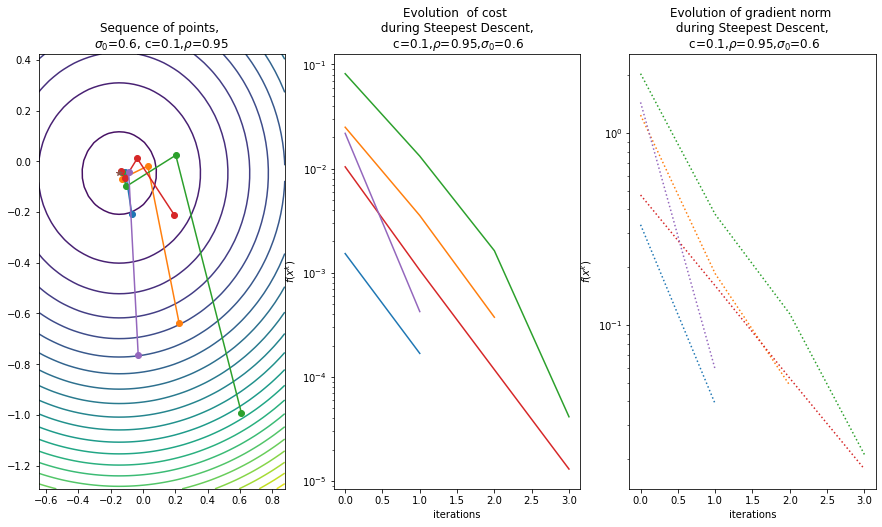

 Il y a au total 2 itérations


In [43]:
#TEST AVEC GRAPHIQUE

Lambda = np.array((1,2)) # Les valeurs propres
np.random.seed(seed=1)
P,q,r= quadratic_problem2d(Lambda)
# check solution existency 
xstar = -np.dot(np.linalg.inv(P),q) #CNS de la solution unique
fmin  = cost(xstar)


# bactrack parameters
sigma0 = 0.6
c=.1
x0 = np.copy(xstar) + 5*(np.random.rand(2,1)-.5)
rho = 0.95
eps=0.01
#method=backtrack(x0,d,cost,crit,sigma0,c,rho,fig = False) # Appel à backtracking
#grid
ax = xstar[0]
bx = xstar[0]
ay = xstar[1]
by = xstar[1]

for test in range(5): # C'est ici qu'on genere les 5 points de départ 
    x0 = np.copy(xstar) + 2.*(np.random.rand(2,1)-.5)
    #
 
    xlist,flist,nlist,k =  steepest_descent_opt(x0,cost,gradient,optimal_step,eps)
    xlist = np.asarray(xlist)
    #
    fig = plt.figure(1,figsize=(15,8)) # 
    
    plt.subplot(1,3,1)
    #plt.plot(xlist[0:2,0], xlist[0:2,1],'o-',label='plt.scatter(a[:], a[:])')
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
    plt.title("Sequence of points, \n"r'$\sigma_0$'"="+str(sigma0)+", c="+str(c)+","r'$\rho$'"="+str(rho)) # On a ici 5 points de départ différents : C'est la différence de couleurs: C'est pour montrer que peu importe la valeur de sigma0, la methode converge.
#    #
    ax = np.min((xlist[:,0,0].min(),ax))-.1
    bx = np.max((xlist[:,0,0].max(),bx))+.1
    ay = np.min((xlist[:,1,0].min(),ay))-.1
    by = np.max((xlist[:,1,0].max(),by))+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist-fmin+1e-16)
    plt.title("Evolution  of cost \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.title("Evolution of gradient norm \n during Steepest Descent, \n c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0))
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid) # Transforme les vecteurs (xgrid,ygrid) en tableau (X,Y)  
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,21) # fonction qui trace les isocontours(courbes de niveau) à partir de X et Y de X, Y = np.meshgrid(xgrid, ygrid)
# Z: Les valeurs de hauteur sur lesquelles le contour est dessiné. Dans notre cas est lié à la fonction cost.

plt.plot(xstar[0], xstar[1],'*',label='points')
plt.show()
print(" Il y a au total {} itérations".format(k)) # Les itérations dépendent égalment de nombres de points générés et de leurs positions.